In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("🌍 ANÁLISIS EXPLORATORIO: CIUDADES TURÍSTICAS MUNDIALES")
print("="*70)

🌍 ANÁLISIS EXPLORATORIO: CIUDADES TURÍSTICAS MUNDIALES


In [2]:
def upload_data_cities():
    """
    Carga el dataset de ciudades turísticas desde el archivo CSV
    """
    print("📂 CARGANDO DATASET DE CIUDADES TURÍSTICAS...")
    
    try:
        # Intentar cargar desde la carpeta data/raw
        df = pd.read_csv('../data/raw/Worldwide Travel Cities Dataset (Ratings and Climate).csv')
        print("✅ Dataset cargado exitosamente")
        
    except FileNotFoundError:
        try:
            # Intentar desde la carpeta actual
            df = pd.read_csv('Worldwide Travel Cities Dataset (Ratings and Climate).csv')
            print("✅ Dataset cargado exitosamente desde carpeta actual")
            
        except FileNotFoundError:
            print("⚠️ Archivo CSV no encontrado. Creando datos de ejemplo...")
            df = create_dummy_data_cities()
    
    # Imprimir columnas y tipos para depuración
    print("Columnas reales del dataset:")
    print(df.columns.tolist())
    print("\nTipos de datos:")
    print(df.dtypes)
    
    # Convertir columnas numéricas a tipo correcto con manejo de errores
    numeric_cols = ['avg_temp_monthly', 'culture', 'adventure', 'nature', 'beaches', 
                    'nightlife', 'cuisine', 'wellness', 'urban', 'seclusion']
    
    for col in numeric_cols:
        if col in df.columns:
            try:
                if df[col].dtype == 'object':  # Solo aplicar str.replace a columnas de tipo string
                    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')
                else:
                    df[col] = pd.to_numeric(df[col], errors='coerce')
            except Exception as e:
                print(f"⚠️ Error al convertir columna {col}: {e}")
    
    # Solo eliminar filas con NaN si hay columnas numéricas válidas
    valid_numeric_cols = [col for col in numeric_cols if col in df.columns]
    if valid_numeric_cols:
        initial_rows = len(df)
        df = df.dropna(subset=valid_numeric_cols, how='all')  # Eliminar solo si TODAS las columnas numéricas son NaN
        final_rows = len(df)
        if initial_rows != final_rows:
            print(f"⚠️ Se eliminaron {initial_rows - final_rows} filas con todos los valores numéricos NaN")
    
    if len(df) == 0:
        print("⚠️ No quedan datos después de la limpieza. Creando datos de ejemplo...")
        df = create_dummy_data_cities()
    
    print(f"📊 Dataset cargado: {df.shape[0]} ciudades, {df.shape[1]} variables")
    return df


In [3]:
def create_dummy_data_cities():
    """
    Crea un dataset de ejemplo basado en la estructura real del dataset
    """
    print("🔨 CREANDO DATOS DE EJEMPLO...")
    
    np.random.seed(42)
    
    # Ciudades turísticas famosas
    cities = [
        'Paris', 'London', 'Tokyo', 'New York', 'Barcelona', 'Rome', 'Dubai', 'Singapore',
        'Amsterdam', 'Vienna', 'Prague', 'Istanbul', 'Bangkok', 'Sydney', 'Melbourne'
    ]
    
    # Países correspondientes
    countries = [
        'France', 'UK', 'Japan', 'USA', 'Spain', 'Italy', 'UAE', 'Singapore',
        'Netherlands', 'Austria', 'Czech Republic', 'Turkey', 'Thailand', 'Australia', 'Australia'
    ]
    
    # Regiones para las ciudades
    regions = ['Europe', 'Europe', 'Asia', 'North America', 'Europe', 'Europe', 'Asia', 'Asia',
              'Europe', 'Europe', 'Europe', 'Asia', 'Asia', 'Oceania', 'Oceania']
    
    # Generar datos realistas
    n_cities = len(cities)
    
    data = {
        'id': range(1, n_cities + 1),
        'city': cities,
        'country': countries,
        'region': regions,
        'short_description': [f'Beautiful destination in {city}' for city in cities],
        'latitude': np.random.uniform(-60, 60, n_cities),  # Rangos más realistas
        'longitude': np.random.uniform(-180, 180, n_cities),
        'avg_temp_monthly': np.random.normal(15, 8, n_cities),  # Temperaturas más realistas
        'ideal_durations': np.random.choice(['1-3 days', '4-7 days', '7+ days'], n_cities),
        'budget_level': np.random.choice(['Low', 'Medium', 'High'], n_cities),
        'culture': np.clip(np.random.normal(7.8, 1.0, n_cities), 1, 10),
        'adventure': np.clip(np.random.normal(6.5, 1.2, n_cities), 1, 10),
        'nature': np.clip(np.random.normal(6.8, 1.3, n_cities), 1, 10),
        'beaches': np.clip(np.random.normal(5.5, 1.5, n_cities), 1, 10),
        'nightlife': np.clip(np.random.normal(6.8, 1.5, n_cities), 1, 10),
        'cuisine': np.clip(np.random.normal(7.3, 1.3, n_cities), 1, 10),
        'wellness': np.clip(np.random.normal(6.5, 1.2, n_cities), 1, 10),
        'urban': np.clip(np.random.normal(7.1, 1.2, n_cities), 1, 10),
        'seclusion': np.clip(np.random.normal(6.0, 1.4, n_cities), 1, 10)
    }
    
    df = pd.DataFrame(data)
    
    # Redondear ratings
    rating_cols = ['culture', 'adventure', 'nature', 'beaches', 'nightlife', 
                   'cuisine', 'wellness', 'urban', 'seclusion']
    for col in rating_cols:
        df[col] = np.round(df[col], 1)
    
    df['avg_temp_monthly'] = np.round(df['avg_temp_monthly'], 1)
    
    print(f"✅ Dataset de ejemplo creado: {len(df)} ciudades turísticas")
    return df


In [4]:
# ========================================
# 2. EXPLORACIÓN INICIAL
# ========================================
def initial_data_exploration(df):
    """
    Realiza la exploración inicial del dataset de ciudades turísticas
    """
    print("="*70)
    print("🔍 EXPLORACIÓN INICIAL DEL DATASET")
    print("="*70)
    
    # Verificar que el dataframe no esté vacío
    if len(df) == 0:
        print("⚠️ El dataframe está vacío")
        return None
    
    # Información básica del dataset
    print(f"\n📊 DIMENSIONES DEL DATASET:")
    print(f"   • Ciudades analizadas: {df.shape[0]:,}")
    print(f"   • Variables disponibles: {df.shape[1]:,}")
    
    print(f"\n📋 INFORMACIÓN DETALLADA DE COLUMNAS:")
    df.info()
    
    print(f"\n🗂️ TIPOS DE DATOS:")
    types = df.dtypes.value_counts()
    for dtype, quantity in types.items():
        print(f"   • {dtype}: {quantity} columnas")
    
    # Mostrar primeras filas
    print(f"\n👁️ MUESTRA DE DATOS (PRIMERAS 5 CIUDADES):")
    print(df.head())
    
    # Estadísticas descriptivas solo para columnas numéricas
    numeric_df = df.select_dtypes(include=[np.number])
    if not numeric_df.empty:
        print(f"\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
        statistics = numeric_df.describe()
        print(statistics.round(2))
    else:
        print(f"\n📈 No hay columnas numéricas para estadísticas descriptivas")
        statistics = pd.DataFrame()
    
    # Variables categóricas
    print(f"\n🌍 ANÁLISIS DE VARIABLES CATEGÓRICAS:")
    
    if 'region' in df.columns and not df['region'].isna().all():
        print("\n📍 Distribución por Región:")
        region_counts = df['region'].value_counts()
        total_regions = len(df)
        for reg, count in region_counts.items():
            percentage = (count / total_regions) * 100 if total_regions > 0 else 0
            print(f"   • {reg}: {count} ciudades ({percentage:.1f}%)")
    
    if 'country' in df.columns and not df['country'].isna().all():
        unique_countries = df['country'].nunique()
        print(f"\n🏳️ Países únicos: {unique_countries}")
        if unique_countries <= 20:
            print("Top 5 países con más ciudades:")
            top_countries = df['country'].value_counts().head()
            for country, count in top_countries.items():
                print(f"   • {country}: {count} ciudades")
    
    return statistics


In [5]:
# ========================================
# 3. ANÁLISIS DE CALIDAD DE DATOS
# ========================================
def quality_analysis_cities(df):
    """
    Analiza la calidad de los datos del dataset de ciudades
    """
    print("="*70)
    print("🧹 ANÁLISIS DE CALIDAD DE DATOS")
    print("="*70)
    
    if len(df) == 0:
        print("⚠️ El dataframe está vacío")
        return {'nulos': pd.Series(), 'duplicados': 0, 'completitud': 0}
    
    # Análisis de valores nulos
    print(f"\n❌ ANÁLISIS DE VALORES NULOS:")
    nulls = df.isnull().sum()
    nulls_percentage = (nulls / len(df)) * 100 if len(df) > 0 else nulls * 0
    
    there_are_nulls = False
    for col in df.columns:
        if nulls[col] > 0:
            there_are_nulls = True
            print(f"   • {col}: {nulls[col]} valores nulos ({nulls_percentage[col]:.1f}%)")
    
    if not there_are_nulls:
        print("   ✅ No hay valores nulos en el dataset")
    
    # Análisis de duplicados
    duplicated = df.duplicated().sum()
    print(f"\n🔄 ANÁLISIS DE DUPLICADOS:")
    print(f"   • Filas duplicadas: {duplicated}")
    
    if duplicated == 0:
        print("   ✅ No hay filas completamente duplicadas")
    
    # Verificar duplicados por ciudad
    if 'city' in df.columns and not df['city'].isna().all():
        duplicated_cities = df['city'].duplicated().sum()
        print(f"   • Ciudades duplicadas: {duplicated_cities}")
        if duplicated_cities > 0:
            print("   ⚠️ Ciudades que aparecen más de una vez:")
            dups = df[df['city'].duplicated(keep=False)]['city'].value_counts()
            for ciudad, count in dups.head().items():
                print(f"     - {ciudad}: {count} veces")
    
    # Análisis de valores únicos
    print(f"\n🎯 VALORES ÚNICOS POR COLUMNA:")
    for col in df.columns:
        unique = df[col].nunique()
        unique_percentage = (unique / len(df)) * 100 if len(df) > 0 else 0
        print(f"   • {col}: {unique} valores únicos ({unique_percentage:.1f}%)")
    
    # Detectar posibles outliers en variables numéricas
    print(f"\n📊 DETECCIÓN PRELIMINAR DE OUTLIERS:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        if not df[col].isna().all() and len(df[col].dropna()) > 0:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            if IQR > 0:  # Evitar división por cero
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
                if len(outliers) > 0:
                    outlier_percentage = (len(outliers) / len(df)) * 100 if len(df) > 0 else 0
                    print(f"   • {col}: {len(outliers)} posibles outliers ({outlier_percentage:.1f}%)")
    
    # Resumen de calidad
    print(f"\n📋 RESUMEN DE CALIDAD:")
    total_cells = df.shape[0] * df.shape[1]
    empty_cells = df.isnull().sum().sum()
    completeness = ((total_cells - empty_cells) / total_cells) * 100 if total_cells > 0 else 0
    
    print(f"   • Completitud de datos: {completeness:.1f}%")
    complete_rows = len(df.dropna())
    total_rows = len(df)
    complete_percentage = (complete_rows / total_rows) * 100 if total_rows > 0 else 0
    print(f"   • Filas completas: {complete_rows} de {total_rows} ({complete_percentage:.1f}%)")
    
    return {
        'nulos': nulls,
        'duplicados': duplicated,
        'completitud': completeness
    }


In [6]:
# ========================================
# 4. VISUALIZACIONES INICIALES
# ========================================
def create_initial_visualizations(df):
    """
    Crea visualizaciones iniciales para entender el dataset
    """
    print("="*70)
    print("📊 CREANDO VISUALIZACIONES INICIALES")
    print("="*70)
    
    if len(df) == 0:
        print("⚠️ No se pueden crear visualizaciones: dataframe vacío")
        return
    
    # Configurar subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('🌍 Análisis Inicial: Ciudades Turísticas Mundiales', 
                 fontsize=16, fontweight='bold')
    
    plots_created = 0
    
    # Gráfico 1: Distribución de Seclusion Rating
    if 'seclusion' in df.columns and not df['seclusion'].isna().all():
        try:
            seclusion_data = df['seclusion'].dropna()
            if len(seclusion_data) > 0:
                seclusion_data.hist(bins=min(20, len(seclusion_data)), alpha=0.7, color='skyblue', ax=axes[0,0])
                mean_seclusion = seclusion_data.mean()
                axes[0,0].axvline(mean_seclusion, color='red', linestyle='--', 
                                 label=f'Media: {mean_seclusion:.2f}')
                axes[0,0].set_title('Distribución del Rating de Aislamiento')
                axes[0,0].set_xlabel('Rating de Aislamiento')
                axes[0,0].set_ylabel('Número de Ciudades')
                axes[0,0].legend()
                axes[0,0].grid(True, alpha=0.3)
                plots_created += 1
        except Exception as e:
            print(f"Error creando gráfico de seclusion: {e}")
    
    # Gráfico 2: Ciudades por Región
    if 'region' in df.columns and not df['region'].isna().all():
        try:
            region_counts = df['region'].value_counts()
            if len(region_counts) > 0:
                bars = axes[0,1].bar(region_counts.index, region_counts.values, 
                                    color='lightcoral')
                axes[0,1].set_title('Distribución de Ciudades por Región')
                axes[0,1].set_xlabel('Región')
                axes[0,1].set_ylabel('Número de Ciudades')
                axes[0,1].tick_params(axis='x', rotation=45)
                
                # Añadir valores en las barras
                for bar, valor in zip(bars, region_counts.values):
                    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                                  str(valor), ha='center', va='bottom')
                plots_created += 1
        except Exception as e:
            print(f"Error creando gráfico de regiones: {e}")
    
    
    # Gráfico 3: Relación entre cultura y seclusión
    if 'seclusion' in df.columns and 'culture' in df.columns:
        try:
            # Filtrar datos válidos
            valid_data = df[['culture', 'seclusion']].dropna()
            print(f"Gráfico 3 - valid_data shape: {valid_data.shape}")
            print(f"Gráfico 3 - primeros valores: {valid_data.head()}")
            
            if len(valid_data) > 0:
                scatter = axes[1,0].scatter(valid_data['culture'], valid_data['seclusion'], 
                                        alpha=0.6, color='green', s=50)
                axes[1,0].set_title('Cultura vs Rating de Aislamiento')
                axes[1,0].set_xlabel('Rating de Cultura')
                axes[1,0].set_ylabel('Rating de Aislamiento')
                axes[1,0].grid(True, alpha=0.3)
                
                # Línea de tendencia solo si hay más de 1 punto
                if len(valid_data) > 1:
                    try:
                        z = np.polyfit(valid_data['culture'], valid_data['seclusion'], 1)
                        p = np.poly1d(z)
                        culture_sorted = sorted(valid_data['culture'])
                        axes[1,0].plot(culture_sorted, p(culture_sorted), "r--", alpha=0.8, label='Tendencia')
                        axes[1,0].legend()
                    except Exception as trend_error:
                        print(f"Error en línea de tendencia: {trend_error}")
                
                plots_created += 1
                print(f"Gráfico 3 creado exitosamente, plots_created: {plots_created}")
            else:
                print("No hay datos válidos para Gráfico 3")
        except Exception as e:
            print(f"Error creando gráfico 3: {e}")
            import traceback
            traceback.print_exc()
        
    # Gráfico 4: Top ciudades mejor valoradas
    if 'seclusion' in df.columns and 'city' in df.columns:
        try:
            # Filtrar datos válidos
            valid_cities = df[['city', 'seclusion']].dropna()
            print(f"Gráfico 4 - valid_cities shape: {valid_cities.shape}")
            
            if len(valid_cities) > 0:
                n_cities = min(10, len(valid_cities))
                top_cities = valid_cities.nlargest(n_cities, 'seclusion')  # DEFINIR AQUÍ
                print(f"Gráfico 4 - top_cities shape: {top_cities.shape}")
                print(f"Gráfico 4 - top_cities valores: {top_cities['seclusion'].tolist()}")
                
                if len(top_cities) > 0:
                    # Crear posiciones y valores como arrays simples
                    cities_list = top_cities['city'].tolist()
                    seclusion_list = top_cities['seclusion'].tolist()
                    y_positions = list(range(len(cities_list)))
                    
                    # Crear el gráfico de barras horizontales
                    bars = axes[1,1].barh(y_positions, seclusion_list, color='gold', alpha=0.8)
                    
                    # Configurar etiquetas
                    axes[1,1].set_yticks(y_positions)
                    axes[1,1].set_yticklabels(cities_list)
                    axes[1,1].set_title(f'Top {len(top_cities)} Ciudades por Rating de Aislamiento')
                    axes[1,1].set_xlabel('Rating de Aislamiento (1-5)')
                    axes[1,1].invert_yaxis()
                    
                    # Añadir valores en las barras
                    for i, valor in enumerate(seclusion_list):
                        axes[1,1].text(valor + 0.1, i, str(valor), 
                                    va='center', ha='left', fontweight='bold', fontsize=10)
                    
                    # Ajustar límites
                    axes[1,1].set_xlim([0, 6])  # Rango 0-6 para escala 1-5
                    axes[1,1].grid(True, axis='x', alpha=0.3)
                    
                    plots_created += 1
                    print(f"Gráfico 4 creado exitosamente, plots_created: {plots_created}")
                else:
                    print("top_cities está vacío")
            else:
                print("valid_cities está vacío")
                    
        except Exception as e:
            print(f"Error creando gráfico 4: {e}")
            import traceback
            traceback.print_exc()
        
    # Ocultar subplots vacíos
    for i in range(4):
        row, col = divmod(i, 2)
        if i >= plots_created:
            axes[row, col].set_visible(False)
    
    if plots_created == 0:
        print("⚠️ No se pudieron crear visualizaciones con los datos disponibles")
        plt.close()
        return
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ {plots_created} visualizaciones creadas exitosamente")


In [7]:
# ========================================
# 5. ANÁLISIS ESPECÍFICO DEL DATASET
# ========================================
def targeted_analysis_tourism(df):
    """
    Análisis específico para el dataset de turismo
    """
    print("="*70)
    print("🏖️ ANÁLISIS ESPECÍFICO DE TURISMO")
    print("="*70)
    
    if len(df) == 0:
        print("⚠️ No hay datos para analizar")
        return False
    
    # Análisis de ratings
    rating_columns = ['culture', 'adventure', 'nature', 'beaches', 'nightlife', 
                     'cuisine', 'wellness', 'urban', 'seclusion']
    
    valid_rating_columns = [col for col in rating_columns if col in df.columns]
    
    if valid_rating_columns:
        print(f"\n⭐ ANÁLISIS DE RATINGS:")
        print(f"Variables de rating encontradas: {len(valid_rating_columns)}")
        
        for col in valid_rating_columns:
            try:
                valid_data = df[col].dropna()
                if len(valid_data) > 0:
                    mean_rating = valid_data.mean()
                    std_rating = valid_data.std()
                    print(f"   • {col}: {mean_rating:.2f} ± {std_rating:.2f}")
                else:
                    print(f"   • {col}: No hay datos válidos")
            except Exception as e:
                print(f"   • {col}: Error al calcular estadísticas - {e}")
    
    # Análisis de clima
    climate_columns = ['avg_temp_monthly']
    valid_climate_columns = [col for col in climate_columns if col in df.columns]
    
    if valid_climate_columns:
        print(f"\n🌤️ ANÁLISIS DE CLIMA:")
        print(f"Variables de clima encontradas: {len(valid_climate_columns)}")
        
        for col in valid_climate_columns:
            try:
                if df[col].dtype in ['int64', 'float64']:
                    valid_data = df[col].dropna()
                    if len(valid_data) > 0:
                        mean_val = valid_data.mean()
                        std_val = valid_data.std()
                        print(f"   • {col}: {mean_val:.2f} ± {std_val:.2f} °C")
                    else:
                        print(f"   • {col}: No hay datos válidos")
                else:
                    print(f"   • {col}: Datos no numéricos")
            except Exception as e:
                print(f"   • {col}: Error al calcular estadísticas - {e}")
    
    # Análisis de costos
    if 'budget_level' in df.columns and not df['budget_level'].isna().all():
        print(f"\n💰 ANÁLISIS DE COSTOS:")
        try:
            budget_counts = df['budget_level'].value_counts()
            print("   • Distribución por nivel de presupuesto:")
            for level, count in budget_counts.items():
                percentage = (count / len(df)) * 100 if len(df) > 0 else 0
                print(f"     - {level}: {count} ciudades ({percentage:.1f}%)")
        except Exception as e:
            print(f"   • Error en análisis de costos: {e}")
    
    # Análisis de duración ideal
    if 'ideal_durations' in df.columns and not df['ideal_durations'].isna().all():
        print(f"\n📅 ANÁLISIS DE DURACIÓN IDEAL:")
        try:
            duration_counts = df['ideal_durations'].value_counts()
            print("   • Distribución por duración ideal:")
            for duration, count in duration_counts.items():
                percentage = (count / len(df)) * 100 if len(df) > 0 else 0
                print(f"     - {duration}: {count} ciudades ({percentage:.1f}%)")
        except Exception as e:
            print(f"   • Error en análisis de duración: {e}")
    
    # Ciudades extremas
    if ('seclusion' in df.columns and 'city' in df.columns and 
        not df['seclusion'].isna().all() and not df['city'].isna().all()):
        print(f"\n🏆 CIUDADES DESTACADAS:")
        
        try:
            # Filtrar datos válidos
            valid_cities = df[['city', 'seclusion']].dropna()
            
            if len(valid_cities) >= 5:
                # Top 5 mejor valoradas
                top_5 = valid_cities.nlargest(5, 'seclusion')
                print("Top 5 ciudades mejor valoradas (por aislamiento):")
                for idx, row in top_5.iterrows():
                    print(f"   • {row['city']}: {row['seclusion']:.1f}/10")
                
                # Bottom 5 peor valoradas
                bottom_5 = valid_cities.nsmallest(5, 'seclusion')
                print("\nTop 5 ciudades con menor rating (por aislamiento):")
                for idx, row in bottom_5.iterrows():
                    print(f"   • {row['city']}: {row['seclusion']:.1f}/10")
                    
            elif len(valid_cities) > 0:
                n_cities = min(len(valid_cities), 3)
                top_cities = valid_cities.nlargest(n_cities, 'seclusion')
                print(f"Top {n_cities} ciudades mejor valoradas (por aislamiento):")
                for idx, row in top_cities.iterrows():
                    print(f"   • {row['city']}: {row['seclusion']:.1f}/10")
            else:
                print("   • No hay datos válidos para mostrar ciudades destacadas")
                
        except Exception as e:
            print(f"   • Error al analizar ciudades destacadas: {e}")
    
    return True


🚀 INICIANDO EDA - FASE 1: EXPLORACIÓN INICIAL
Dataset: Worldwide Travel Cities Ratings and Climate
📂 CARGANDO DATASET DE CIUDADES TURÍSTICAS...
✅ Dataset cargado exitosamente
Columnas reales del dataset:
['id', 'city', 'country', 'region', 'short_description', 'latitude', 'longitude', 'avg_temp_monthly', 'ideal_durations', 'budget_level', 'culture', 'adventure', 'nature', 'beaches', 'nightlife', 'cuisine', 'wellness', 'urban', 'seclusion']

Tipos de datos:
id                    object
city                  object
country               object
region                object
short_description     object
latitude             float64
longitude            float64
avg_temp_monthly      object
ideal_durations       object
budget_level          object
culture                int64
adventure              int64
nature                 int64
beaches                int64
nightlife              int64
cuisine                int64
wellness               int64
urban                  int64
seclusion        

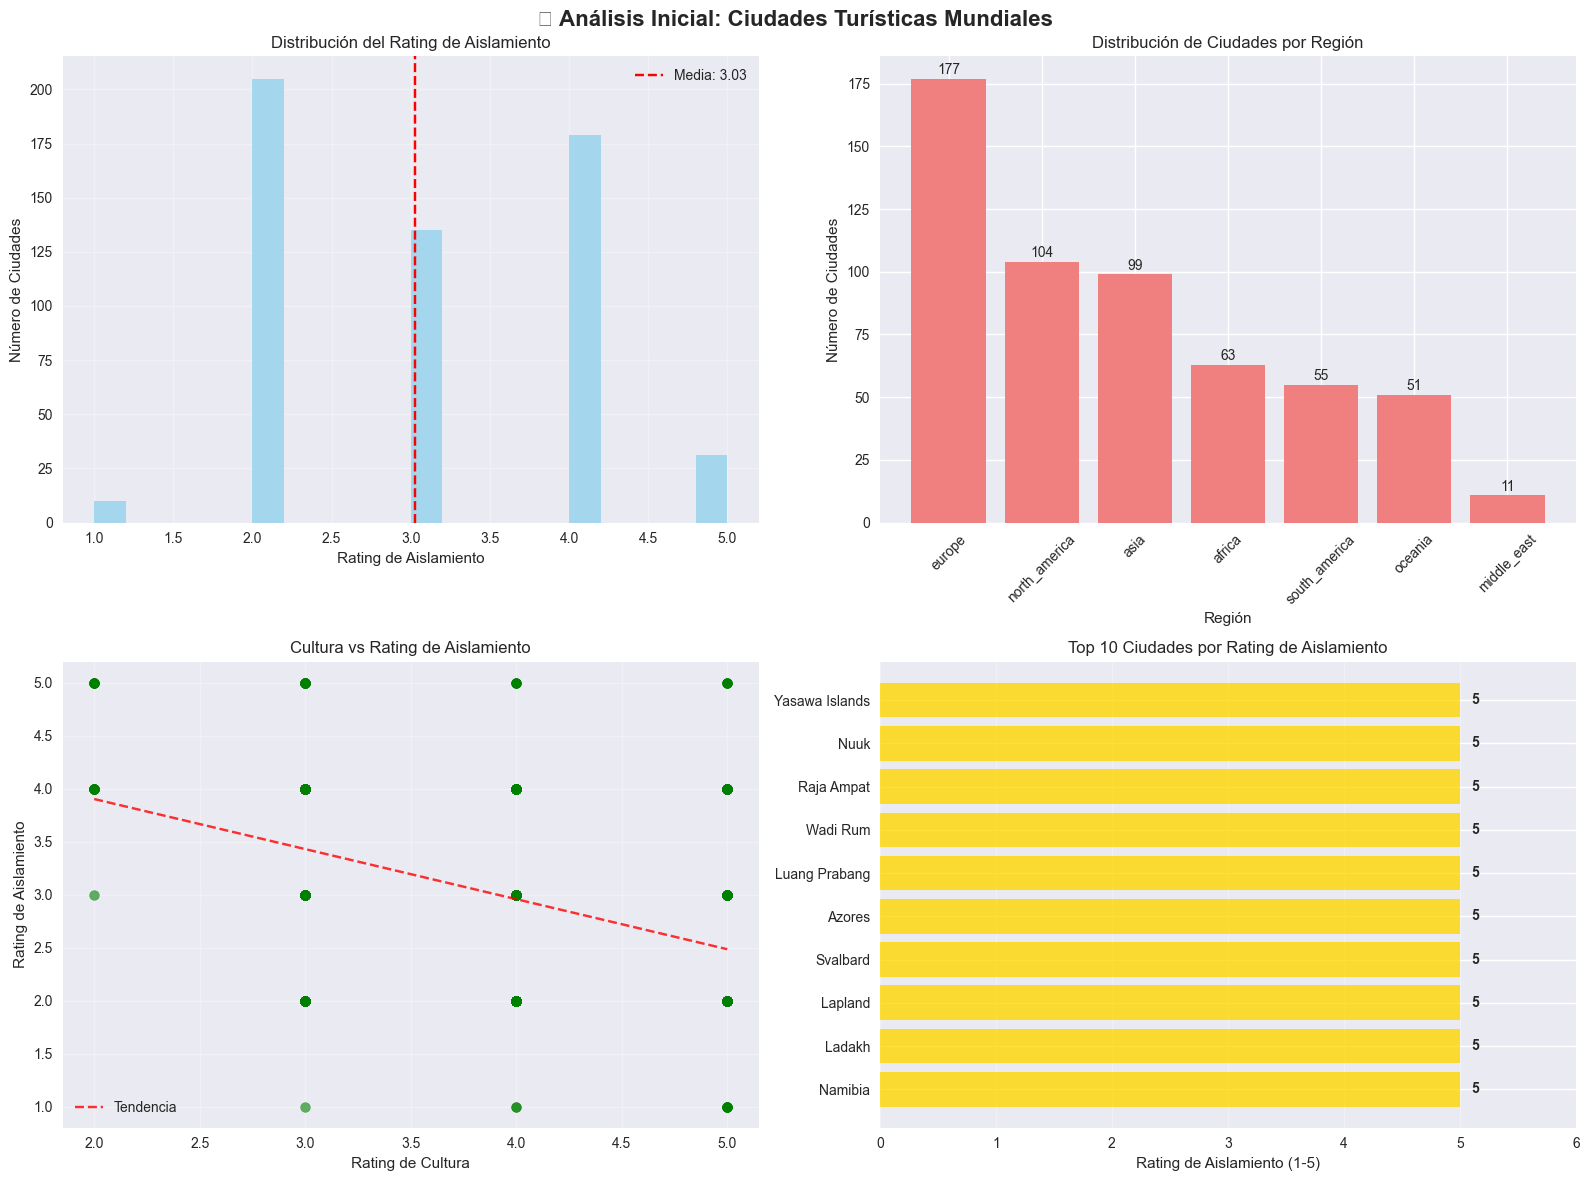

✅ 4 visualizaciones creadas exitosamente

🎯 Iniciando análisis específico de turismo...
🏖️ ANÁLISIS ESPECÍFICO DE TURISMO

⭐ ANÁLISIS DE RATINGS:
Variables de rating encontradas: 9
   • culture: 3.85 ± 0.81
   • adventure: 3.18 ± 0.80
   • nature: 3.73 ± 0.90
   • beaches: 2.38 ± 1.44
   • nightlife: 3.02 ± 0.92
   • cuisine: 3.79 ± 0.68
   • wellness: 3.07 ± 0.59
   • urban: 3.15 ± 1.02
   • seclusion: 3.03 ± 0.99

🌤️ ANÁLISIS DE CLIMA:
Variables de clima encontradas: 1
   • avg_temp_monthly: No hay datos válidos

💰 ANÁLISIS DE COSTOS:
   • Distribución por nivel de presupuesto:
     - Mid-range: 339 ciudades (60.5%)
     - Budget: 145 ciudades (25.9%)
     - Luxury: 76 ciudades (13.6%)

📅 ANÁLISIS DE DURACIÓN IDEAL:
   • Distribución por duración ideal:
     - ["Short trip","Weekend","One week"]: 120 ciudades (21.4%)
     - ["Short trip","Weekend"]: 115 ciudades (20.5%)
     - ["Weekend","One week","Short trip"]: 53 ciudades (9.5%)
     - ["Short trip","One week"]: 49 ciudades (8.8%)

In [8]:
# ========================================
# 6. FUNCIÓN PRINCIPAL FASE 1
# ========================================
def main_phase1_cities():
    """
    Función principal que ejecuta toda la Fase 1 del análisis de ciudades
    """
    print("🚀 INICIANDO EDA - FASE 1: EXPLORACIÓN INICIAL")
    print("Dataset: Worldwide Travel Cities Ratings and Climate")
    print("="*70)
    
    try:
        # 1. Cargar datos
        df = upload_data_cities()
        
        # Verificar que hay datos para procesar
        if len(df) == 0:
            print("❌ No se pudieron cargar datos válidos")
            return None, None, None
        
        # 2. Exploración inicial
        statistics = initial_data_exploration(df)
        
        # 3. Análisis de calidad
        quality_info = quality_analysis_cities(df)
        
        # 4. Crear visualizaciones iniciales
        try:
            create_initial_visualizations(df)
        except Exception as e:
            print(f"⚠️ Error en visualizaciones: {e}. Continuando con el análisis...")
        
        # 5. Análisis específico
        print("\n🎯 Iniciando análisis específico de turismo...")
        targeted_analysis_tourism(df)
        
        print("\n" + "="*70)
        print("✅ FASE 1 COMPLETADA EXITOSAMENTE")
        print("📊 Dataset de ciudades turísticas cargado y explorado")
        print(f"🌍 {len(df)} ciudades analizadas")
        print("📝 Próximo paso: Limpieza y preprocesamiento de datos")
        
        return df, statistics, quality_info
        
    except Exception as e:
        print(f"❌ Error en la ejecución principal: {e}")
        print("🔄 Intenta ejecutar las funciones individualmente para diagnosticar el problema")
        return None, None, None

# Ejecutar si se llama directamente
if __name__ == "__main__":
    try:
        df_original, statistics, quality_info = main_phase1_cities()
        if df_original is not None:
            print(f"\n🎉 Análisis completado exitosamente!")
        else:
            print(f"\n⚠️ El análisis encontró problemas. Revisa los mensajes anteriores.")
    except Exception as e:
        print(f"❌ Error crítico: {e}")
        import traceback
        traceback.print_exc()